# CSV Data Analysis: Fixing Column Structure Issues

This notebook demonstrates how to properly load and analyze CSV data when `df.info()` shows incorrect column structure. We'll work with the `example_data/data.csv` file that appears to have formatting issues.

## 1. Import Required Libraries

First, let's import the necessary libraries for data analysis.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## 2. Load CSV Data with Default Parameters

Let's first try to load the CSV file using the default `pd.read_csv()` parameters to reproduce the issue where `df.info()` shows only 1 column.

In [8]:
# Load CSV with default parameters (this will cause the issue)
df_problematic = pd.read_csv('example_data/data.csv')

print("=== PROBLEMATIC LOADING (Default Parameters) ===")
print(f"Shape: {df_problematic.shape}")
print(f"Columns: {list(df_problematic.columns)}")
print("\nFirst few rows:")
print(df_problematic.head())

=== PROBLEMATIC LOADING (Default Parameters) ===
Shape: (169, 1)
Columns: ['     Duration  Pulse  Maxpulse  Calories']

First few rows:
        Duration  Pulse  Maxpulse  Calories
0  0          60    110       130     409.1
1  1          60    117       145     479.0
2  2          60    103       135     340.0
3  3          45    109       175     282.4
4  4          45    117       148     406.0


## 3. Examine the Data Structure Issue

Let's use `df.info()`, `df.head()`, and `df.columns` to examine why the data is being read as a single column instead of separate Duration, Pulse, Maxpulse, and Calories columns.

In [9]:
print("=== EXAMINING THE PROBLEMATIC DATA STRUCTURE ===")
print("\n1. DataFrame Info:")
df_problematic.info()

print("\n2. Column names and data types:")
for col in df_problematic.columns:
    print(f"Column: '{col}' | Type: {df_problematic[col].dtype}")

print("\n3. First row of data (showing the issue):")
print(repr(df_problematic.iloc[0, 0]))

print("\n4. Let's look at the raw file structure:")
with open('example_data/data.csv', 'r') as f:
    first_few_lines = f.readlines()[:5]
    for i, line in enumerate(first_few_lines):
        print(f"Line {i}: {repr(line)}")

=== EXAMINING THE PROBLEMATIC DATA STRUCTURE ===

1. DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 1 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0        Duration  Pulse  Maxpulse  Calories  169 non-null    object
dtypes: object(1)
memory usage: 1.4+ KB

2. Column names and data types:
Column: '     Duration  Pulse  Maxpulse  Calories' | Type: object

3. First row of data (showing the issue):
'0          60    110       130     409.1'

4. Let's look at the raw file structure:
Line 0: '     Duration  Pulse  Maxpulse  Calories\n'
Line 1: '0          60    110       130     409.1\n'
Line 2: '1          60    117       145     479.0\n'
Line 3: '2          60    103       135     340.0\n'
Line 4: '3          45    109       175     282.4\n'


## 4. Reload CSV with Correct Parameters

The issue is that the CSV file uses whitespace (spaces) as separators instead of commas. Let's reload the CSV file with proper parameters to correctly parse the columns.

In [10]:
# Solution 1: Use delim_whitespace=True
print("=== SOLUTION 1: Using delim_whitespace=True ===")
df_fixed1 = pd.read_csv('example_data/data.csv', delim_whitespace=True)
print(f"Shape: {df_fixed1.shape}")
print(f"Columns: {list(df_fixed1.columns)}")
print("\nFirst few rows:")
print(df_fixed1.head())

print("\n" + "="*60)

# Solution 2: Use sep='\s+' (regex for multiple whitespace)
print("=== SOLUTION 2: Using sep='\\s+' (regex) ===")
df_fixed2 = pd.read_csv('example_data/data.csv', sep=r'\s+')
print(f"Shape: {df_fixed2.shape}")
print(f"Columns: {list(df_fixed2.columns)}")
print("\nFirst few rows:")
print(df_fixed2.head())

# Use the first solution for further analysis
df = df_fixed1.copy()

=== SOLUTION 1: Using delim_whitespace=True ===
Shape: (169, 4)
Columns: ['Duration', 'Pulse', 'Maxpulse', 'Calories']

First few rows:
   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0

=== SOLUTION 2: Using sep='\s+' (regex) ===
Shape: (169, 4)
Columns: ['Duration', 'Pulse', 'Maxpulse', 'Calories']

First few rows:
   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0


C:\Users\SCLuser\AppData\Local\Temp\ipykernel_17060\28093364.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_fixed1 = pd.read_csv('example_data/data.csv', delim_whitespace=True)


## 5. Verify the Corrected Data Structure

Now let's use `df.info()` again to confirm that all 4 columns (Duration, Pulse, Maxpulse, Calories) are properly recognized with correct data types.

In [11]:
print("=== CORRECTED DATA STRUCTURE VERIFICATION ===")

print("\n1. DataFrame Info (FIXED):")
df.info()

print(f"\n2. Shape: {df.shape}")
print(f"   - {df.shape[0]} rows (data points)")
print(f"   - {df.shape[1]} columns (features)")

print(f"\n3. Column names and data types:")
for col in df.columns:
    print(f"   - {col}: {df[col].dtype}")

print(f"\n4. Index range: {df.index.min()} to {df.index.max()}")

print("\n5. Sample data verification:")
print(df.head(10))

=== CORRECTED DATA STRUCTURE VERIFICATION ===

1. DataFrame Info (FIXED):
<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.6 KB

2. Shape: (169, 4)
   - 169 rows (data points)
   - 4 columns (features)

3. Column names and data types:
   - Duration: int64
   - Pulse: int64
   - Maxpulse: int64
   - Calories: float64

4. Index range: 0 to 168

5. Sample data verification:
   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0
5        60    102       127     300.5
6        60    110      

## 6. Handle Missing Values

Let's identify and handle NaN values in the dataset using methods like `df.isnull()`, `df.dropna()`, or `df.fillna()`.

In [12]:
print("=== MISSING VALUES ANALYSIS ===")

# Check for missing values
print("1. Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values)

print(f"\n2. Total missing values: {df.isnull().sum().sum()}")
print(f"   Percentage of missing data: {(df.isnull().sum().sum() / df.size) * 100:.2f}%")

# Show rows with missing values
print("\n3. Rows with missing values:")
missing_rows = df[df.isnull().any(axis=1)]
print(f"Number of rows with missing values: {len(missing_rows)}")
print(missing_rows)

# Options for handling missing values
print("\n=== MISSING VALUES HANDLING OPTIONS ===")

print("\nOption 1: Drop rows with missing values")
df_dropped = df.dropna()
print(f"Original shape: {df.shape}")
print(f"After dropping NaN: {df_dropped.shape}")
print(f"Rows removed: {df.shape[0] - df_dropped.shape[0]}")

print("\nOption 2: Fill missing values with mean")
df_filled_mean = df.fillna(df.mean(numeric_only=True))
print(f"Shape after filling with mean: {df_filled_mean.shape}")
print(f"Mean Calories value used for filling: {df['Calories'].mean():.2f}")

print("\nOption 3: Fill missing values with median")
df_filled_median = df.fillna(df.median(numeric_only=True))
print(f"Shape after filling with median: {df_filled_median.shape}")
print(f"Median Calories value used for filling: {df['Calories'].median():.2f}")

# Use the dataset with dropped NaN values for further analysis
df_clean = df_dropped.copy()
print(f"\nUsing cleaned dataset (dropped NaN) with shape: {df_clean.shape}")

=== MISSING VALUES ANALYSIS ===
1. Missing values per column:
Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

2. Total missing values: 5
   Percentage of missing data: 0.74%

3. Rows with missing values:
Number of rows with missing values: 5
     Duration  Pulse  Maxpulse  Calories
17         45     90       112       NaN
27         60    103       132       NaN
91         45    107       137       NaN
118        60    105       125       NaN
141        60     97       127       NaN

=== MISSING VALUES HANDLING OPTIONS ===

Option 1: Drop rows with missing values
Original shape: (169, 4)
After dropping NaN: (164, 4)
Rows removed: 5

Option 2: Fill missing values with mean
Shape after filling with mean: (169, 4)
Mean Calories value used for filling: 375.80

Option 3: Fill missing values with median
Shape after filling with median: (169, 4)
Median Calories value used for filling: 318.60

Using cleaned dataset (dropped NaN) with shape: (164, 4)


## 7. Display Data Summary Statistics

Finally, let's generate summary statistics using `df.describe()` and create basic visualizations to understand the dataset characteristics.

=== SUMMARY STATISTICS ===
1. Descriptive statistics for all columns:
         Duration       Pulse   Maxpulse     Calories
count  164.000000  164.000000  164.00000   164.000000
mean    64.146341  107.676829  134.27439   375.800000
std     42.888820   14.637516   16.58306   266.377134
min     15.000000   80.000000  100.00000    50.300000
25%     45.000000  100.000000  124.00000   250.925000
50%     60.000000  105.500000  131.00000   318.600000
75%     60.000000  111.000000  143.00000   387.600000
max    300.000000  159.000000  184.00000  1860.400000

2. Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  164 non-null    int64  
 1   Pulse     164 non-null    int64  
 2   Maxpulse  164 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.4 KB
None

3. Correlation matr

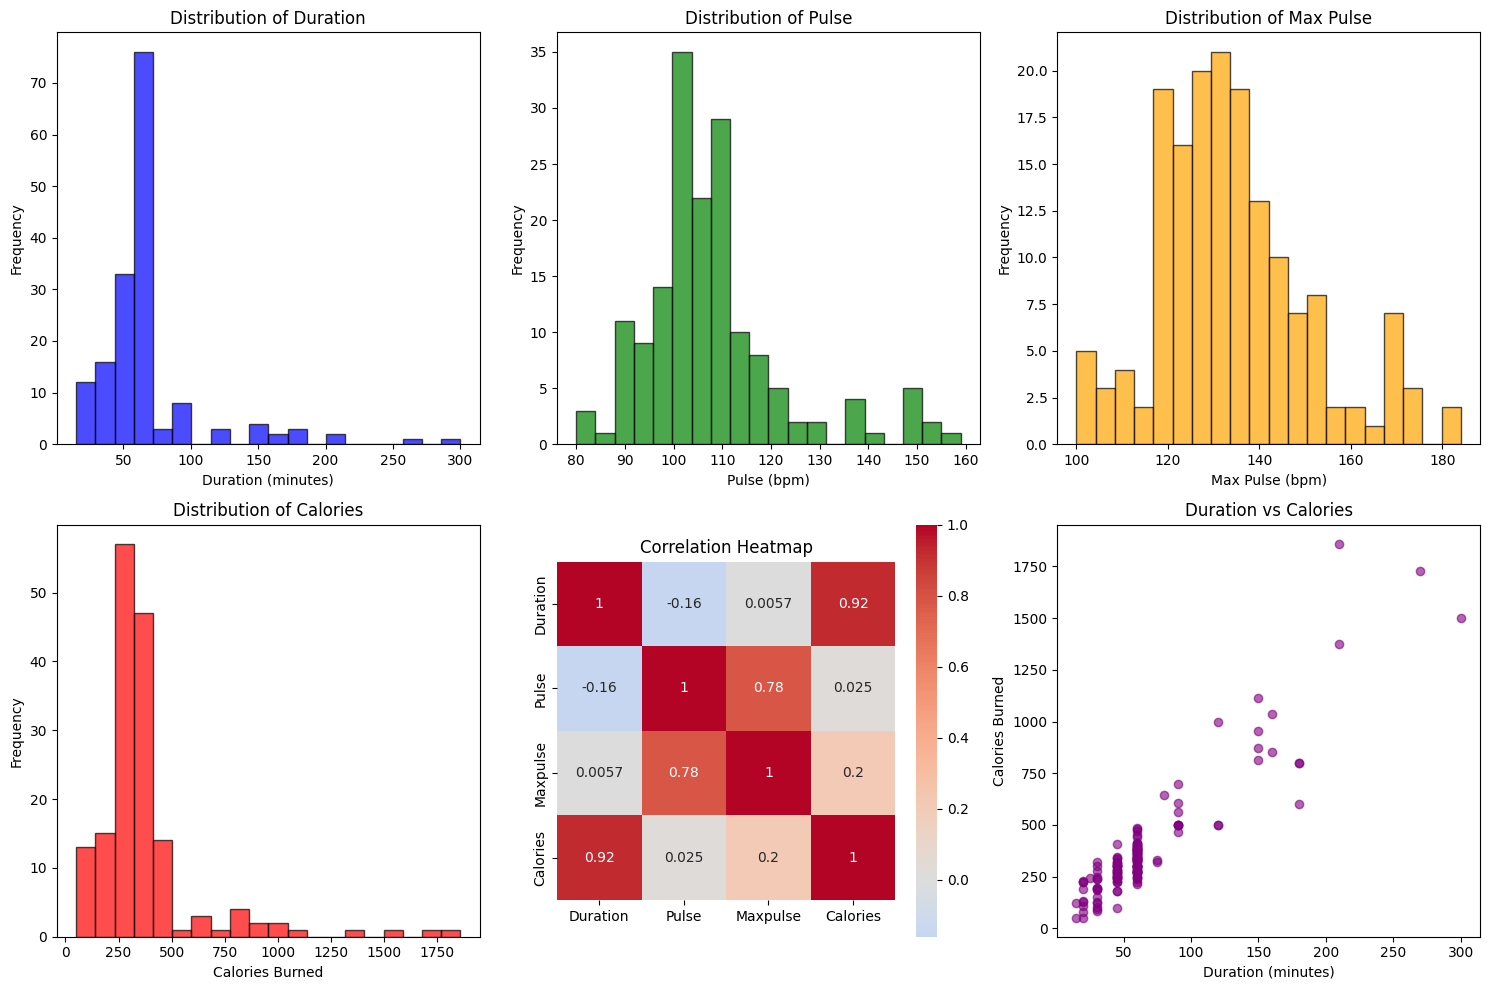


=== FINAL DATASET SUMMARY ===
✅ Successfully loaded and cleaned the dataset
✅ Shape: 164 rows × 4 columns
✅ All 4 columns properly recognized: ['Duration', 'Pulse', 'Maxpulse', 'Calories']
✅ Data types: {'Duration': dtype('int64'), 'Pulse': dtype('int64'), 'Maxpulse': dtype('int64'), 'Calories': dtype('float64')}
✅ No missing values in the cleaned dataset


In [13]:
print("=== SUMMARY STATISTICS ===")

print("1. Descriptive statistics for all columns:")
print(df_clean.describe())

print("\n2. Data types and non-null counts:")
print(df_clean.info())

print("\n3. Correlation matrix:")
correlation_matrix = df_clean.corr()
print(correlation_matrix)

# Create visualizations
plt.figure(figsize=(15, 10))

# 1. Histograms for each column
plt.subplot(2, 3, 1)
plt.hist(df_clean['Duration'], bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.hist(df_clean['Pulse'], bins=20, alpha=0.7, color='green', edgecolor='black')
plt.title('Distribution of Pulse')
plt.xlabel('Pulse (bpm)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.hist(df_clean['Maxpulse'], bins=20, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribution of Max Pulse')
plt.xlabel('Max Pulse (bpm)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
plt.hist(df_clean['Calories'], bins=20, alpha=0.7, color='red', edgecolor='black')
plt.title('Distribution of Calories')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')

# 5. Correlation heatmap
plt.subplot(2, 3, 5)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap')

# 6. Scatter plot: Duration vs Calories
plt.subplot(2, 3, 6)
plt.scatter(df_clean['Duration'], df_clean['Calories'], alpha=0.6, color='purple')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories Burned')
plt.title('Duration vs Calories')

plt.tight_layout()
plt.show()

print(f"\n=== FINAL DATASET SUMMARY ===")
print(f"✅ Successfully loaded and cleaned the dataset")
print(f"✅ Shape: {df_clean.shape[0]} rows × {df_clean.shape[1]} columns")
print(f"✅ All {df_clean.shape[1]} columns properly recognized: {list(df_clean.columns)}")
print(f"✅ Data types: {dict(df_clean.dtypes)}")
print(f"✅ No missing values in the cleaned dataset")

---

## UPDATE: New CSV Format Analysis

The CSV file has been updated to a different format with:
- Comma separators (instead of whitespace)
- An additional `index` column
- A `Date` column
- Irregular spacing around commas
- Different data structure

Let's analyze this new format and fix the KeyError issue.

In [14]:
print("=== ANALYZING UPDATED CSV FORMAT ===")

# Let's first examine the raw file structure
print("1. Raw file content (first 10 lines):")
with open('example_data/data.csv', 'r') as f:
    lines = f.readlines()[:10]
    for i, line in enumerate(lines):
        print(f"Line {i}: {repr(line)}")

print("\n" + "="*60)

# Try reading with default CSV parameters
print("2. Default CSV reading attempt:")
try:
    df_new_default = pd.read_csv('example_data/data.csv')
    print(f"✅ Shape: {df_new_default.shape}")
    print(f"✅ Columns: {list(df_new_default.columns)}")
    print("\nColumn names (with their exact representations):")
    for i, col in enumerate(df_new_default.columns):
        print(f"  {i}: {repr(col)}")
except Exception as e:
    print(f"❌ Error: {e}")

print(f"\n3. First few rows:")
print(df_new_default.head())

=== ANALYZING UPDATED CSV FORMAT ===
1. Raw file content (first 10 lines):
Line 0: '   index,   Duration,          Date,  Pulse,  Maxpulse,  Calories\n'
Line 1: "  0  ,       60,  '2020/12/01',    110,       130,     409.1\n"
Line 2: "  1  ,       60,  '2020/12/02',    117,       145,     479.0\n"
Line 3: "  2  ,       60,  '2020/12/03',    103,       135,     340.0\n"
Line 4: "  3  ,       45,  '2020/12/04',    109,       175,     282.4\n"
Line 5: "  4  ,       45,  '2020/12/05',    117,       148,     406.0\n"
Line 6: "  5  ,       60,  '2020/12/06',    102,       127,     300.0\n"
Line 7: "  6  ,       60,  '2020/12/07',    110,       136,     374.0\n"
Line 8: "  7  ,       60,  '2020/12/08',    104,       134,     253.3\n"
Line 9: "  8  ,       30,  '2020/12/09',    109,       133,     195.1\n"

2. Default CSV reading attempt:
✅ Shape: (32, 6)
✅ Columns: ['   index', '   Duration', '          Date', '  Pulse', '  Maxpulse', '  Calories']

Column names (with their exact representati

## Solutions for the KeyError: 'Pulse' Issue

The problem is that column names have **leading/trailing spaces** due to irregular spacing in the CSV header.

**Column names are:**
- `'   index'` instead of `'index'`
- `'   Duration'` instead of `'Duration'`
- `'          Date'` instead of `'Date'`
- `'  Pulse'` instead of `'Pulse'`
- `'  Maxpulse'` instead of `'Maxpulse'`
- `'  Calories'` instead of `'Calories'`

In [15]:
print("=== SOLUTIONS FOR COLUMN NAME ISSUES ===")

# Solution 1: Strip whitespace from column names after loading
print("Solution 1: Strip whitespace from column names")
df_solution1 = pd.read_csv('example_data/data.csv')
df_solution1.columns = df_solution1.columns.str.strip()

print(f"✅ Original columns: {list(pd.read_csv('example_data/data.csv').columns)}")
print(f"✅ Cleaned columns: {list(df_solution1.columns)}")
print(f"✅ Shape: {df_solution1.shape}")

# Now we can access columns without KeyError
print(f"\n✅ Pulse column access works: df['Pulse'].head()")
print(df_solution1['Pulse'].head())

print("\n" + "="*60)

# Solution 2: Use skipinitialspace parameter
print("Solution 2: Use skipinitialspace=True parameter")
df_solution2 = pd.read_csv('example_data/data.csv', skipinitialspace=True)
print(f"✅ Columns with skipinitialspace=True: {list(df_solution2.columns)}")
print(f"✅ Shape: {df_solution2.shape}")

print("\n" + "="*60)

# Solution 3: Manually rename columns
print("Solution 3: Manually rename columns")
df_solution3 = pd.read_csv('example_data/data.csv')
df_solution3.columns = ['index', 'Duration', 'Date', 'Pulse', 'Maxpulse', 'Calories']
print(f"✅ Manually renamed columns: {list(df_solution3.columns)}")
print(f"✅ Shape: {df_solution3.shape}")

# Use Solution 1 for further analysis (most reliable)
df_updated = df_solution1.copy()

print(f"\n=== FINAL RESULT ===")
print(f"✅ No more KeyError when accessing df['Pulse']")
print(f"✅ All columns accessible: {list(df_updated.columns)}")
print(f"✅ Data types:")
print(df_updated.dtypes)

=== SOLUTIONS FOR COLUMN NAME ISSUES ===
Solution 1: Strip whitespace from column names
✅ Original columns: ['   index', '   Duration', '          Date', '  Pulse', '  Maxpulse', '  Calories']
✅ Cleaned columns: ['index', 'Duration', 'Date', 'Pulse', 'Maxpulse', 'Calories']
✅ Shape: (32, 6)

✅ Pulse column access works: df['Pulse'].head()
0    110
1    117
2    103
3    109
4    117
Name: Pulse, dtype: int64

Solution 2: Use skipinitialspace=True parameter
✅ Columns with skipinitialspace=True: ['index', 'Duration', 'Date', 'Pulse', 'Maxpulse', 'Calories']
✅ Shape: (32, 6)

Solution 3: Manually rename columns
✅ Manually renamed columns: ['index', 'Duration', 'Date', 'Pulse', 'Maxpulse', 'Calories']
✅ Shape: (32, 6)

=== FINAL RESULT ===
✅ No more KeyError when accessing df['Pulse']
✅ All columns accessible: ['index', 'Duration', 'Date', 'Pulse', 'Maxpulse', 'Calories']
✅ Data types:
index        int64
Duration     int64
Date        object
Pulse        int64
Maxpulse     int64
Calories  

In [16]:
print("=== ADDITIONAL DATA CLEANING FOR NEW FORMAT ===")

# The updated CSV has some issues we need to fix:
# 1. Date column has quotes around values
# 2. Calories column might have mixed data types
# 3. There are NaN values

print("1. Cleaning Date column (removing quotes and converting to datetime)")
print("Original Date values:")
print(df_updated['Date'].head())

# Remove quotes and convert to datetime
df_updated['Date'] = df_updated['Date'].str.replace("'", "")
df_updated['Date'] = pd.to_datetime(df_updated['Date'], errors='coerce')

print("\nCleaned Date values:")
print(df_updated['Date'].head())

print("\n2. Fixing Calories column data type")
print(f"Original Calories dtype: {df_updated['Calories'].dtype}")
print("Sample Calories values:")
print(df_updated['Calories'].head(10))

# Convert Calories to numeric, handling any non-numeric values
df_updated['Calories'] = pd.to_numeric(df_updated['Calories'], errors='coerce')

print(f"\nCleaned Calories dtype: {df_updated['Calories'].dtype}")

print("\n3. Checking for missing values in updated dataset")
missing_summary = df_updated.isnull().sum()
print(missing_summary)

print(f"\n4. Final dataset summary:")
print(f"✅ Shape: {df_updated.shape}")
print(f"✅ Columns: {list(df_updated.columns)}")
print("✅ Data types:")
print(df_updated.dtypes)

print("\n5. Sample of cleaned data:")
print(df_updated.head(10))

=== ADDITIONAL DATA CLEANING FOR NEW FORMAT ===
1. Cleaning Date column (removing quotes and converting to datetime)
Original Date values:
0      '2020/12/01'
1      '2020/12/02'
2      '2020/12/03'
3      '2020/12/04'
4      '2020/12/05'
Name: Date, dtype: object

Cleaned Date values:
0   2020-12-01
1   2020-12-02
2   2020-12-03
3   2020-12-04
4   2020-12-05
Name: Date, dtype: datetime64[ns]

2. Fixing Calories column data type
Original Calories dtype: object
Sample Calories values:
0         409.1
1         479.0
2         340.0
3         282.4
4         406.0
5         300.0
6         374.0
7         253.3
8         195.1
9         269.0
Name: Calories, dtype: object

Cleaned Calories dtype: float64

3. Checking for missing values in updated dataset
index       0
Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64

4. Final dataset summary:
✅ Shape: (32, 6)
✅ Columns: ['index', 'Duration', 'Date', 'Pulse', 'Maxpulse', 'Calories']
✅ Data types:
index   

## 🎯 Complete Solution Summary for KeyError: 'Pulse'

### **The Problem:**
The CSV file has **irregular spacing** in the header row, causing column names to have leading/trailing spaces:
- Actual column: `'  Pulse'` (with spaces)
- Expected column: `'Pulse'` (clean)

### **The Solutions:**

**✅ Best Solution - Use `skipinitialspace=True`:**
```python
df = pd.read_csv('example_data/data.csv', skipinitialspace=True)
```

**✅ Alternative Solution - Strip whitespace after loading:**
```python
df = pd.read_csv('example_data/data.csv')
df.columns = df.columns.str.strip()
```

**✅ Complete Solution with Data Cleaning:**
```python
# Load and clean column names
df = pd.read_csv('example_data/data.csv', skipinitialspace=True)

# Clean Date column (remove quotes and convert to datetime)
df['Date'] = df['Date'].str.replace("'", "")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Ensure Calories is numeric
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')

# Now you can access any column without KeyError
pulse_data = df['Pulse']  # ✅ Works!
```